<a href="https://colab.research.google.com/github/nathaliacastelobranco/NLP-python-infnet/blob/main/Projeto_Final_Disciplina_Processamento_de_Linguagem_Natural_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - Processamento de linguagem natural com Python

Aluna: Nathalia de Almeida Castelo Branco


### Instalando gerenciador do Kaggle e adicionando chave da API

Configurações e verificação de funcionamento.

In [1]:
!pip install -q kaggle
!rm -rf kaggle.json

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nathaliacbranco","key":"e4f8f098a2a049536dc442077beae1e9"}'}

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# conferindo se funcionou
!kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           3546        120  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          11375       1486  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-04-26 17:30:03           3248         84  1.0              
muratkokludataset/rice-image-dataset         

In [5]:
!ls

kaggle.json  sample_data


In [6]:
# Para fazer o download do PDF
!pip install -U notebook-as-pdf &> /dev/null
!pyppeteer-install &> /dev/null

### Obtenção dos dados

Download dos dados, unzip e verificação dos arquivos

In [7]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
 94% 176M/187M [00:01<00:00, 183MB/s]
100% 187M/187M [00:01<00:00, 145MB/s]


In [8]:
!unzip news-of-the-site-folhauol.zip

Archive:  news-of-the-site-folhauol.zip
  inflating: articles.csv            


In [9]:
!ls

articles.csv  kaggle.json  news-of-the-site-folhauol.zip  sample_data


**Dataset está dentro de 'articles.csv'**

### Importação e instalação de bibliotecas

In [10]:
# instalação do pyLDAvis
!pip install pyldavis &> /dev/null

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

import pyLDAvis
import pyLDAvis.sklearn

from wordcloud import WordCloud

from itertools import chain

from typing import List, Set, Any

from tqdm.auto import tqdm
tqdm.pandas()

import re 
# import spacy

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [12]:
# definindo SEED
SEED = 42

### Tratamento dos dados e extração do período e categoria solicitados

* **Período:** Depois de 2016
* **Categoria:** Mercado
* **Nome do DataFrame:** news_2016

Verificação da data mínima e máxima, tamanho do dataset, conversão de tipos, verificação de tipos, criação do dataframe e recorte dos dados.



In [13]:
# import dataset
df = pd.read_csv("articles.csv")

In [14]:
df.shape

(167053, 6)

In [15]:
# convertendo coluna de data de objeto para datetime
df['date'] = pd.to_datetime(df.date)

In [16]:
news_2016 = df[(df['category'] == 'mercado') & (df['date'].dt.year == 2016 )]

In [17]:
news_2016.shape

(7943, 6)

## Pré-processamento com NLTK

Download dos datasets punkt, stopwords e rslp.
Importação dos mesmos.

In [18]:
import nltk
nltk.download('punkt') # tokenizador
nltk.download('stopwords') # stopwords
nltk.download('rslp')

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [19]:
# NLTK (RSLP - Removedor de sufixo da língua portuguesa)
from nltk.stem.rslp import RSLPStemmer

In [20]:
# stopwords do português
stopwords = nltk.corpus.stopwords.words('portuguese')

### Tokenização NLTK

Crie uma coluna no dataframe **news_2016** contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). Para tal, complete o conteúdo da função tokenize.

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
def tokenize(text):
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`
  
  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  tokens = word_tokenize(text, language='portuguese')
  tokenized_text = []
  st = RSLPStemmer() 

  for token in tokens:
    if token.isalpha():
      tokens_stem = st.stem(token) 
      tokenized_text.append(tokens_stem)
  
  return tokenized_text

In [23]:
news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [24]:
news_2016.shape

(7943, 7)

In [25]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d..."


## Criação de docs SPACY

In [26]:
# atualizando spacy
!pip install -U spacy &> /dev/null

In [27]:
# baixando vocabulário em português
!python -m spacy download pt_core_news_lg &> /dev/null

In [28]:
import spacy

In [29]:
nlp = spacy.load('pt_core_news_lg')

In [30]:
news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(nlp)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Lemmatização com SPACY

In [31]:
# stopwords do SPACY
STOP_WORDS = nlp.Defaults.stop_words

In [32]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

In [33]:
complete_stopwords = stopwords()

In [34]:
def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    undesired = set(['o', 'em','em o', 'em a', 'ano'])
    return w.isalpha() and (w not in complete_stopwords) and (w not in undesired)


In [35]:
def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """ 
    vocab_lemma = []
    for w in doc:
      if filter(w.lemma_):
        vocab_lemma.append(w.lemma_)

    return ' '.join(vocab_lemma)


In [36]:
news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [37]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...",mulher fazendeiro Christine Conder modéstia mo...
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...",conta celular controle ficar cara decisão STF ...
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...",projeto ajuste conta público aprovar mau situa...
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...",década século nota ópera sinfonia brotar pensa...
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...",Cifras Letras selecionar semanalmente lançamen...


## Reconhecimento de entidades nomeadas

Criação de uma coluna que armazena apenas entidades ORG em cada doc.

In [38]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  organizations = []
  for ent in doc.ents:
    if ent.label_ == "ORG":
      organizations.append(ent.text)
        
  return organizations

In [39]:
news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [40]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...",mulher fazendeiro Christine Conder modéstia mo...,"[Ofcom, JFDI, Membro da Ordem do Império Britâ..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...",conta celular controle ficar cara decisão STF ...,"[Oi, TIM, Claro, Vivo, Secretaria de Estado da..."
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...",projeto ajuste conta público aprovar mau situa...,"[Executivo dos três Estados, Executivo, Assemb..."
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...",década século nota ópera sinfonia brotar pensa...,"[MIT, Instituto de Tecnologia de Massachusetts..."
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...",Cifras Letras selecionar semanalmente lançamen...,"[Sistema Financeiro Nacional AUTORES, Amazon]"


### Criação de Bag of Word com TF-IDF

Crie uma coluna **tfidf** no dataframe news_2016. Use a coluna spacy_lemma como base para cálculo do TFIDF. O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (**min_df**) nos documentos.

In [41]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None
      
  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      tfidf_ = TfidfVectorizer(
                                   stop_words=None,
                                   min_df=10,
                                   max_features=5000)
      
      tfidf_.fit(self.doc_tokens)
      self.tfidf = tfidf_ 
      
      return 

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
  array =  vectorizer().transform([tokens]).toarray()[0]
  return array

In [42]:
news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

  0%|          | 0/7943 [00:00<?, ?it/s]

## Extração de Tópicos com LDA

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [43]:
N_TOPICS = 9
EPOCHS = 100

In [44]:
corpus = np.array(news_2016.tfidf.tolist())

In [45]:
lda = LDA(n_components=N_TOPICS, 
          max_iter=EPOCHS,
          random_state=SEED).fit(corpus)

In [46]:
def get_model_topics(model, vectorizer, n_top_words=10):

    for topic, word_vector in enumerate(model.components_):
      total = word_vector.sum()
      largest = word_vector.argsort()[::-1]
      print("\nTopic %02d" % topic)

      # palavra e o percentual de ocorrência em relação ao total de palavras
      for i in range(0, n_top_words):
        print("  %s (%2.2f)" % (vectorizer[largest[i]],
                  word_vector[largest[i]]*100.0/total))

In [47]:
get_model_topics(lda, vectorizer.tfidf.get_feature_names())


Topic 00
  trimestre (1.43)
  queda (1.24)
  inflação (0.85)
  pib (0.77)
  comparação (0.73)
  bilhão (0.71)
  resultado (0.69)
  passado (0.68)
  crescimento (0.65)
  período (0.65)

Topic 01
  empresa (0.64)
  companhia (0.33)
  brasil (0.32)
  milhão (0.32)
  bilhão (0.32)
  país (0.30)
  mercado (0.26)
  venda (0.26)
  outro (0.25)
  acordo (0.25)

Topic 02
  usiminas (1.82)
  feirão (0.97)
  steel (0.90)
  nippon (0.81)
  ccj (0.61)
  paulinho (0.53)
  cármen (0.53)
  lúcia (0.50)
  barroso (0.47)
  ternium (0.45)

Topic 03
  aeroporto (2.45)
  infraero (1.17)
  concessão (1.14)
  terminal (0.97)
  samarco (0.80)
  outorga (0.70)
  edital (0.68)
  arena (0.68)
  espm (0.66)
  publicidade (0.65)

Topic 04
  trabalhador (1.66)
  benefício (1.62)
  aposentadoria (1.60)
  idade (1.40)
  inss (1.26)
  greve (1.12)
  contribuição (1.06)
  voo (1.05)
  salário (1.04)
  sindicato (1.04)

Topic 05
  governo (1.06)
  temer (0.49)
  público (0.47)
  bilhão (0.47)
  presidente (0.47)
  mini

### Visualize os tópicos usando a ferramenta pyLDAVis

In [48]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [49]:
corpus_matrix = np.matrix(corpus)

In [50]:
pyLDAvis.sklearn.prepare(lda, corpus_matrix, vectorizer.tfidf, sort_topics=True)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.021660 -0.002569       1        1  47.985919
5      0.051687  0.003242       2        1  23.277045
6      0.243000 -0.008750       3        1  11.068613
0      0.238672  0.024789       4        1   8.286315
4     -0.156979  0.208911       5        1   2.781433
8     -0.148958 -0.155832       6        1   2.309833
7     -0.076183 -0.034980       7        1   1.578311
3     -0.097401 -0.017682       8        1   1.488906
2     -0.075498 -0.017129       9        1   1.223626, topic_info=              Term        Freq       Total Category  logprob  loglift
1745       energia   83.000000   83.000000  Default  30.0000  30.0000
4729     trimestre  110.000000  110.000000  Default  29.0000  29.0000
3927         queda  154.000000  154.000000  Default  28.0000  28.0000
4989        índice  136.000000  136.000000  Default  27.0000  27.0000
4670   trabalhador   71.000000   71.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2499    inalterado    0.154889    6.102875   Topic9  -8.5944   0.7295
4371      serviços    0.154903    7.670833   Topic9  -8.5943   0.5010
3064  metalúrgicos    0.153979    5.200399   Topic9  -8.6002   0.8837
3062   metalúrgica    0.152651    3.432169   Topic9  -8.6089   1.2906
1741      endereço    0.153046    5.433914   Topic9  -8.6063   0.8337

[530 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         7  0.846208      ab
11        5  0.840652   abear
12        4  0.819486  abecip
18        2  0.088362   abono
18        5  0.795262   abono
...     ...       ...     ...
4989      1  0.051456  índice
4989      2  0.036755  índice
4989      3  0.698337  índice
4989      4  0.205826  índice
4997      5  0.861970   única

[1143 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 7, 1, 5, 9, 8, 4, 3])

### Atribua a cada text, um (e apenas um) tópic. 

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [51]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    topic = lda.transform([tfidf]).argmax()

    return topic

In [52]:
news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [53]:
news_2016.topic.value_counts()

1    4424
5    1922
6     756
0     673
4      66
8      44
7      42
3      16
Name: topic, dtype: int64

## Número de documentos vs tópicos 

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

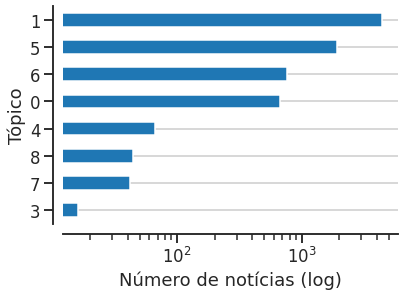

In [54]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')

    ax.yaxis.grid(True)

    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")

    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

A spacy_lemma tem todos os verbos e os radicais, a NER apenas as organizações

In [55]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    wc = WordCloud(background_color="black",
                   colormap="PuRd",
                   max_words=50,
                   width=1000, 
                   height=1000).generate(text)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    return ax
    
def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    # list_of_words = chain(topic_news.spacy_lemma.values.tolist())
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ''.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

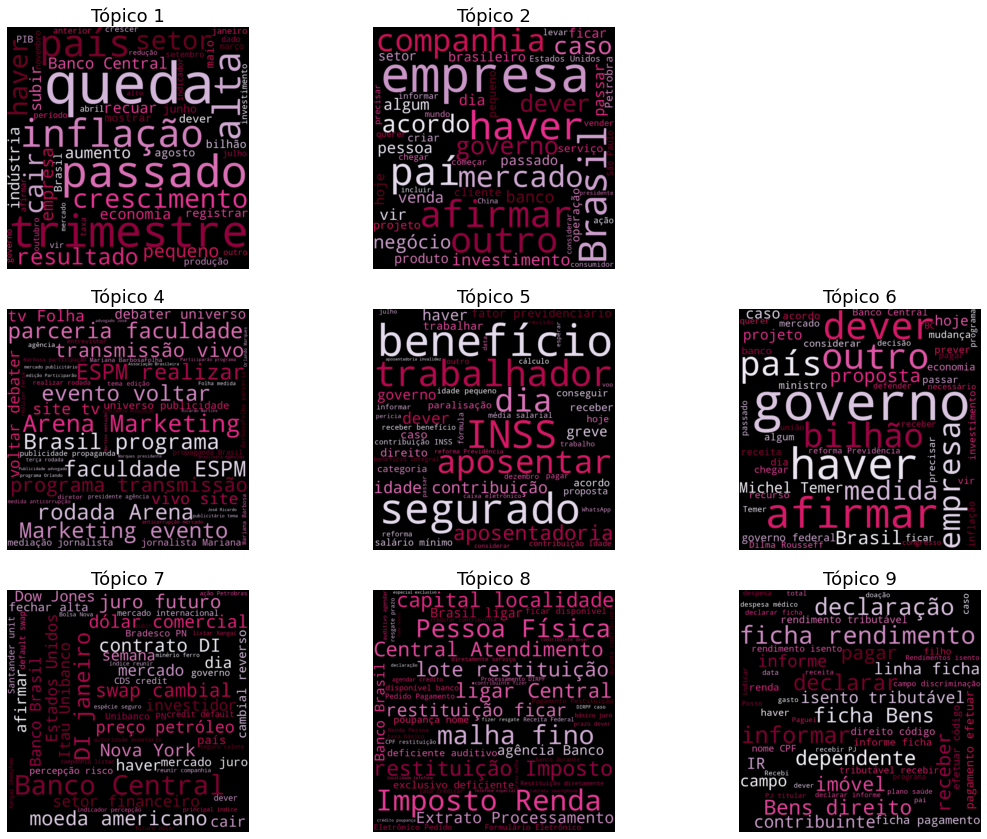

In [56]:
fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    # ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    ax_ = plot_wordcloud_for_a_topic(idx, ax)    # optei por remover o +1 da função pois os tópicos das nuvens não eram correspondentes aos obtidos acima
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}") # Aqui o +1 foi mantido para auxiliar na leitura dos tópicos
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_ner` e  `topic` para essa tarefa. 

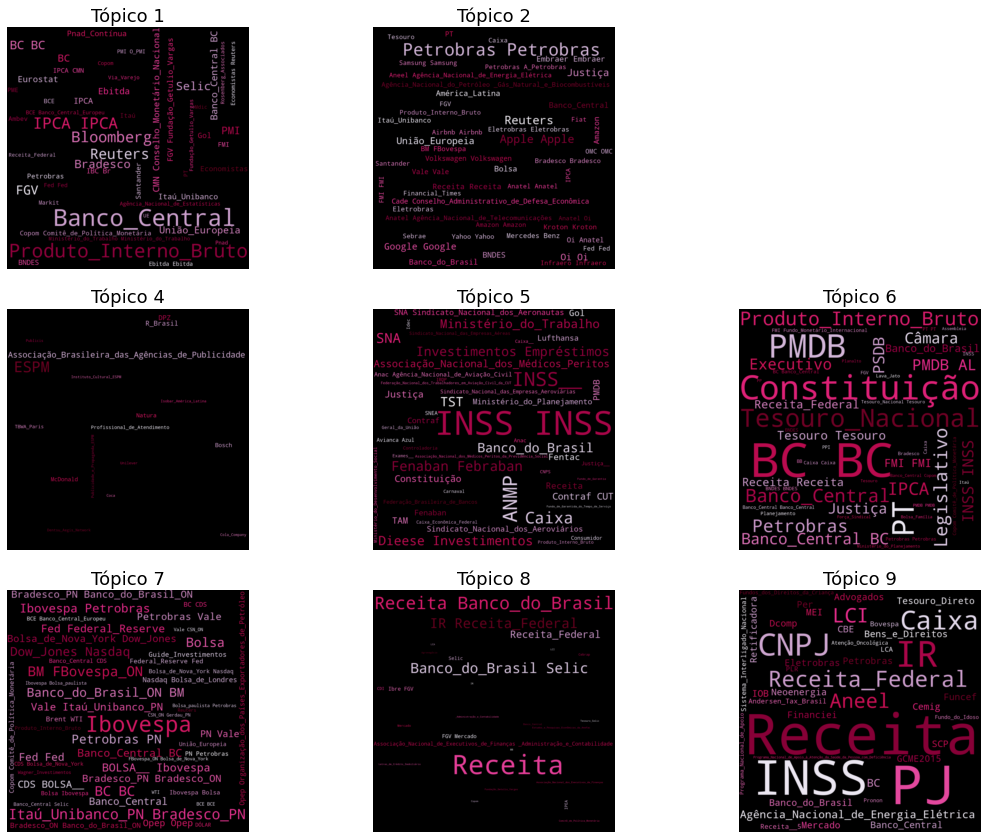

In [57]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    # ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    ax_ = plot_wordcloud_entities_for_a_topic(idx, ax)  # optei por remover o +1 da função pois os tópicos das nuvens não eram correspondentes aos obtidos acima

    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}") # Aqui o +1 foi mantido para auxiliar na leitura dos tópicos
fig.tight_layout()

### Exemplos das palavras com lemmatização e stemming

In [58]:
news_2016.head()

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner,tfidf,topic
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...",mulher fazendeiro Christine Conder modéstia mo...,"[Ofcom, JFDI, Membro da Ordem do Império Britâ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...",conta celular controle ficar cara decisão STF ...,"[Oi, TIM, Claro, Vivo, Secretaria de Estado da...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34245,Ajustes sobre servidores públicos emperram nos...,A maior parte dos projetos de ajuste das conta...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, mai, part, do, projet, de, ajust, da, cont...","(A, maior, parte, dos, projetos, de, ajuste, d...",projeto ajuste conta público aprovar mau situa...,"[Executivo dos três Estados, Executivo, Assemb...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5
34248,Inventor da internet das coisas ataca mitos so...,Desde as primeiras décadas do século 19 se diz...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[desd, as, prim, déc, do, sécul, se, diz, que,...","(Desde, as, primeiras, décadas, do, século, 19...",década século nota ópera sinfonia brotar pensa...,"[MIT, Instituto de Tecnologia de Massachusetts...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
34249,Livro analisa empresas de crescimento exponenc...,O Cifras & Letras seleciona semanalmente lança...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[o, cifr, letr, selec, seman, lanç, na, áre, d...","(O, Cifras, &, Letras, seleciona, semanalmente...",Cifras Letras selecionar semanalmente lançamen...,"[Sistema Financeiro Nacional AUTORES, Amazon]","[0.0, 0.03909582507814426, 0.0, 0.0, 0.0, 0.0,...",1


In [59]:
news_2016.iloc[2,1] # text

'A maior parte dos projetos de ajuste das contas públicas aprovados nos três Estados em pior situação financeira —Rio, Minas e Rio Grande do Sul— não resolve o principal problema que levou os governantes à atual crise: o aumento dos gastos com pessoal.  Levantamento feito pela Folha em 64 projetos enviados pelo Executivo dos três Estados mostra que pouco mais da metade (36) foi aprovada nas Assembleias locais.  Apenas sete tratam de salários, previdência e benefícios de servidores públicos. Cinco deles foram aprovados no Rio Grande do Sul.  Consideradas impopulares, medidas de ajuste que recaem sobre servidores costumam ser evitadas pela classe política, pois podem desencadear em greves que afetam serviços essenciais.  Talvez por isso a saída preferencial das autoridades tem sido medidas que alteram o funcionamento ou reduzem os órgãos públicos: 22 das propostas aprovadas vão nessa linha.  Isso nem sempre significa redução das despesas com funcionários públicos já contratados. Em Minas

In [60]:
news_2016.iloc[2,6] # stemming

['a',
 'mai',
 'part',
 'do',
 'projet',
 'de',
 'ajust',
 'da',
 'cont',
 'públic',
 'aprov',
 'no',
 'trê',
 'est',
 'em',
 'pi',
 'situ',
 'financ',
 'min',
 'e',
 'rio',
 'grand',
 'do',
 'não',
 'resolv',
 'o',
 'princip',
 'problem',
 'que',
 'lev',
 'os',
 'govern',
 'à',
 'atual',
 'cris',
 'o',
 'aument',
 'do',
 'gast',
 'com',
 'pessoal',
 'levant',
 'feit',
 'pel',
 'folh',
 'em',
 'projet',
 'envi',
 'pel',
 'execu',
 'do',
 'trê',
 'est',
 'mostr',
 'que',
 'pouc',
 'mais',
 'da',
 'metad',
 'foi',
 'aprov',
 'na',
 'assemble',
 'local',
 'apen',
 'set',
 'trat',
 'de',
 'salári',
 'previd',
 'e',
 'benefíci',
 'de',
 'serv',
 'públic',
 'cinc',
 'del',
 'for',
 'aprov',
 'no',
 'rio',
 'grand',
 'do',
 'sul',
 'consider',
 'impopul',
 'med',
 'de',
 'ajust',
 'que',
 'reca',
 'sobr',
 'serv',
 'costum',
 'ser',
 'evit',
 'pel',
 'cl',
 'polít',
 'poi',
 'pod',
 'desencad',
 'em',
 'grev',
 'que',
 'afet',
 'serviç',
 'essenc',
 'talv',
 'por',
 'iss',
 'a',
 'saíd',
 'pr

In [61]:
news_2016.iloc[2,8]

'projeto ajuste conta público aprovar mau situação financeiro Rio Minas Rio Grande Sul resolver principal problema levar governante atual crise aumento gasto pessoal levantamento Folha projeto enviar executivo mostrar metade aprovar assembleia tratar salário previdência benefício servidor público aprovar Rio Grande Sul Consideradas impopular medida ajuste recair servidor costumar evitar classe político desencadear greve afetar serviço essencial saída preferencial autoridade medida alterar funcionamento reduzir órgão público proposta aprovar linha significar redução despesa funcionário público contratar Minas único medida aprovar tratar funcionalismo prever corte cargo vago anunciar eliminação outro medida aprovar mapear reportagem extinguir fundação secretaria servidor realocar Rio decretar calamidade financeiro proposta enviar Executivo Assembleia aprovar rejeitar devolver mudança executivo adiamento aumento salarial servidor prever aumento contribuição previdenciário atual retirar pa